In [1]:
%matplotlib inline
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from string import punctuation
from nltk.corpus import stopwords
from pandas.io.json import json_normalize
from nltk.tokenize import RegexpTokenizer

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/ubuntu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# Removes tokens from stop word list.
def text_tokens(token_list,stop_words):
    tokens = []
    for token in token_list:
        token_value = token.lower()
        if token_value not in stop_words:
            tokens.append(token_value)
    return tokens

In [4]:
# Tokenizes tweets.
def tokenizer(text,tknzr,stop_words):
    return text_tokens(tknzr.tokenize(text),stop_words)

In [5]:
# Creates set of words from all tokens.
def vocab_build(token_list):
    vocab = {}
    count = 0
    for tokens in token_list:
        for word in tokens:
            if word not in vocab:
                vocab[word] = count
                count +=1
    return vocab

In [6]:
# Determines term with largest frequency in a set of tweets.
def most_frequent_term(token_list):
    term_counter = {}
    largest_term = None
    largest_frequency = 0
    for tokens in token_list:
        frequency = nltk.FreqDist(tokens)
        for term,count in frequency.items():
            term_counter[term] = 1 + term_counter.get(term,0)
    for term,count in term_counter.items():   
        if count > largest_frequency:
                largest_term = term
                largest_frequency = count
    return largest_term,largest_frequency

In [7]:
# Determines most frequent term for each company per daily percentage difference value.
def term_percentage_diff(df,ticker_list):
    terms = []
    for ticker in tickers:
        percentage_diff = set(df['daily_diff_percentage_of_stock'][df.ticker==ticker].values)
        for percentage in percentage_diff:
            term,count = most_frequent_term(df.tokens[(df['daily_diff_percentage_of_stock']==percentage)&(df.ticker==\
                                                                                                          ticker)])
            terms.append({'Company':companies[ticker],'Percentage_diff':percentage,'Most frequent term':term,'Frequency':\
                          count})
    df_terms = json_normalize(terms)
    terms = set(df_terms['Most frequent term'])
    avg_percentage_diff = []
    for term in terms:
        avg_diff = df_terms.Percentage_diff[df_terms['Most frequent term']==term].mean()
        term_frequency = df_terms.Frequency[df_terms['Most frequent term']==term].sum()
        avg_percentage_diff.append({'Term':term,'Avg % diff':avg_diff,'Frequency':term_frequency})
    df_avg_diff = json_normalize(avg_percentage_diff)
    return df_terms,df_avg_diff,terms

In [8]:
companies = {'AAPL':'Apple','ADDYY':'Adidas','ALL':'Allstate','AMZN':'Amazon','BBY':'Best Buy','BMWYY':'BMW',\
             'BRK.A':'Berkshire Hathaway','F':'Ford','FB':'Facebook','GM':'General Motors','GOOGL':'Google',\
             'GS':'Goldman Sachs','HD':'Home Depot','HMC':'Honda','JPM':'JPMorgan','KR':'Kroger','MCD':"McDonald's",\
             'MET':'MetLife','MSFT':'Microsoft','NKE':'Nike','NSANY':'Nissan','SBUX':'Starbucks','TM':'Toyota',\
             'TSLA':'Tesla','UAA':'Under Armour','WMT':'Walmart'}

In [9]:
punctuation_parse = [mark for mark in punctuation]
word_parse = stopwords.words('english')
stop_words = punctuation_parse + word_parse

In [10]:
tknzr = RegexpTokenizer('\w+')

In [11]:
df = pd.read_json('twitter_data.json')

In [12]:
# Difference between stock opening and closing price.
df['daily_diff'] = df.close-df.open

In [13]:
# Percentage a stock has changed from opening at close.
df['daily_diff_percentage_of_stock'] = (df.daily_diff/df.open)*100

In [14]:
# Classification of 1 if stock has increased at close and 0 if it has remained the same or decreased.
df['up_down'] = [1 if daily_diff > 0 else 0 for daily_diff in df.daily_diff.values]

In [15]:
df.columns

Index(['background_image', 'close', 'contributors_enabled', 'date',
       'favorite_count', 'favorited', 'geo_enabled', 'high', 'low', 'open',
       'reply', 'reply_count', 'retweet_count', 'text', 'ticker', 'time',
       'urls', 'user.favourites_count', 'user.followers_count',
       'user.friends_count', 'user.listed_count', 'user.screen_name',
       'user.statuses_count', 'user_mentions', 'verified', 'volume',
       'daily_diff', 'daily_diff_percentage_of_stock', 'up_down'],
      dtype='object')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228919 entries, 0 to 99999
Data columns (total 29 columns):
background_image                  228919 non-null int64
close                             228919 non-null float64
contributors_enabled              228919 non-null int64
date                              228919 non-null datetime64[ns]
favorite_count                    228919 non-null int64
favorited                         228919 non-null int64
geo_enabled                       228919 non-null int64
high                              228919 non-null float64
low                               228919 non-null float64
open                              228919 non-null float64
reply                             228919 non-null int64
reply_count                       228919 non-null int64
retweet_count                     228919 non-null int64
text                              228919 non-null object
ticker                            228919 non-null object
time                           

In [17]:
df.head()

,background_image,close,contributors_enabled,date,favorite_count,favorited,geo_enabled,high,low,open,...,user.friends_count,user.listed_count,user.screen_name,user.statuses_count,user_mentions,verified,volume,daily_diff,daily_diff_percentage_of_stock,up_down
0,1,195.09,0,1970-01-01 00:00:00.000000001,3,0,0,196.33,189.810,190.02,...,11044,1421,Losfinancieros,127149,0,0,51034237,5.07,2.668140,1
1,0,195.09,0,1970-01-01 00:00:00.000000001,0,0,0,196.33,189.810,190.02,...,3648,425,CarlCarano,95931,2,0,51034237,5.07,2.668140,1
10,1,25.54,0,1970-01-01 00:25:55.459200000,0,0,1,25.95,25.415,25.75,...,608,49,ATucci826,28872,2,0,6078311,-0.21,-0.815534,0
100,1,25.57,0,1970-01-01 00:25:55.372800000,0,0,0,25.67,25.440,25.57,...,644,3,ShanellMidwest_,95610,0,0,4428696,0.00,0.000000,0
1000,0,25.57,0,1970-01-01 00:25:55.372800000,0,0,0,25.67,25.440,25.57,...,2203,1,AndrewL48276395,2106,0,0,4428696,0.00,0.000000,0


In [18]:
tickers = set(df.ticker)

In [19]:
tickers

{'AAPL',
 'ADDYY',
 'ALL',
 'AMZN',
 'BBY',
 'BMWYY',
 'BRK.A',
 'F',
 'FB',
 'GM',
 'GOOGL',
 'GS',
 'HD',
 'HMC',
 'JPM',
 'KR',
 'MCD',
 'MET',
 'MSFT',
 'NKE',
 'NSANY',
 'SBUX',
 'TM',
 'TSLA',
 'UAA',
 'WMT'}

In [20]:
# Percentage of dataset each company makes-up, along with what percentage of the company's samples are up, down, or the 
# same at closing.
data = []
total_samples = len(df)
for ticker in tickers:
    samples = len(df[df.ticker==ticker])
    sample_percentage = 100*samples/total_samples
    percentage_up = len(df[(df.up_down==1)&(df.ticker==ticker)])/samples*100
    percentage_down = len(df[(df.up_down==0)&(df.ticker==ticker)])/samples*100
    data.append({'Company':companies[ticker],'% up':percentage_up,'% down_or_same':percentage_down,'Ticker':ticker,\
                 'Samples':samples,'% of samples':sample_percentage})

In [21]:
df_difference = json_normalize(data)

In [22]:
df_difference

,% down_or_same,% of samples,% up,Company,Samples,Ticker
0,0.000000,2.572962,100.000000,Google,5890,GOOGL
1,100.000000,4.343458,0.000000,Best Buy,9943,BBY
2,100.000000,4.343458,0.000000,BMW,9943,BMWYY
3,43.890785,3.199822,56.109215,Allstate,7325,ALL
4,0.000000,4.365736,100.000000,Ford,9994,F
5,100.000000,4.356563,0.000000,Tesla,9973,TSLA
6,8.338893,2.619267,91.661107,Facebook,5996,FB
7,0.000000,4.347826,100.000000,Toyota,9953,TM
8,0.000000,6.522394,100.000000,Walmart,14931,WMT
9,32.197791,4.231628,67.802209,Home Depot,9687,HD


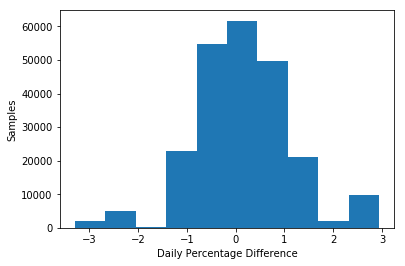

In [23]:
plt.hist(df['daily_diff_percentage_of_stock'],bins=10)
plt.xlabel('Daily Percentage Difference')
plt.ylabel('Samples')
plt.show()

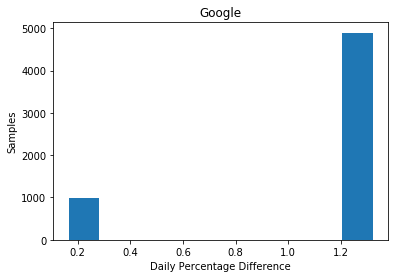

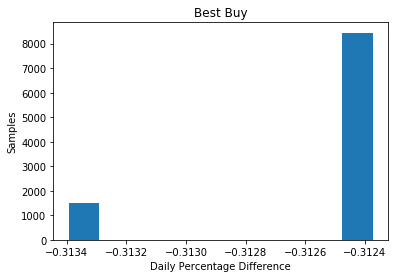

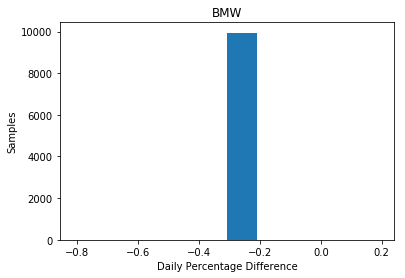

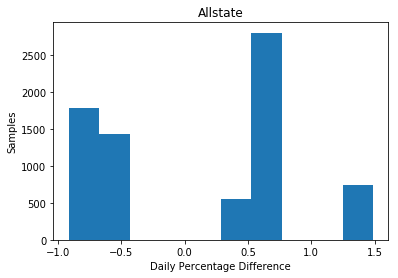

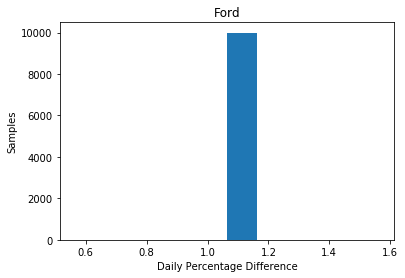

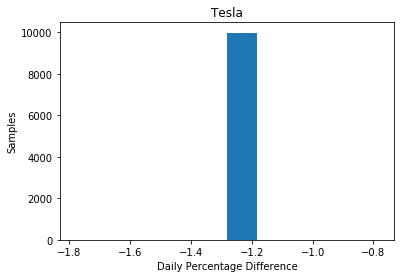

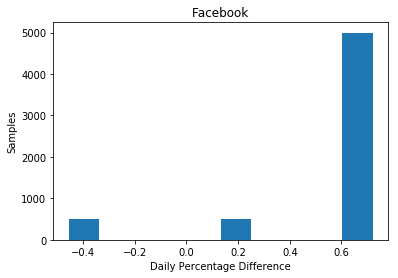

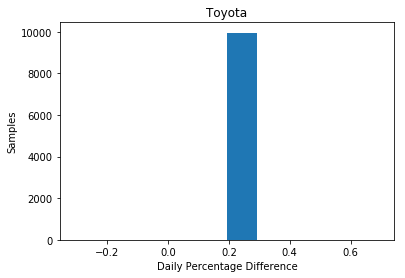

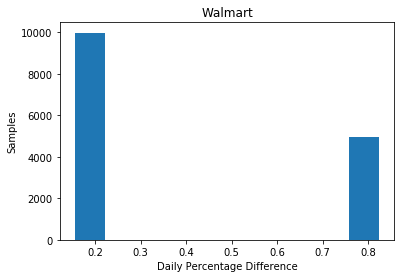

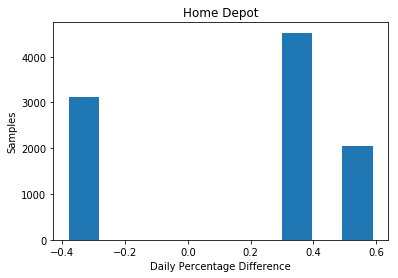

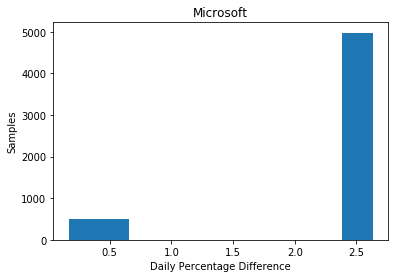

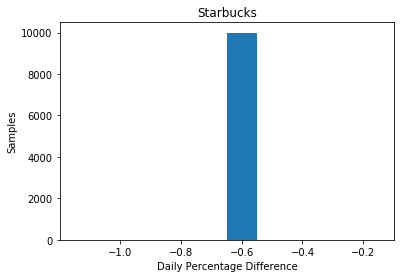

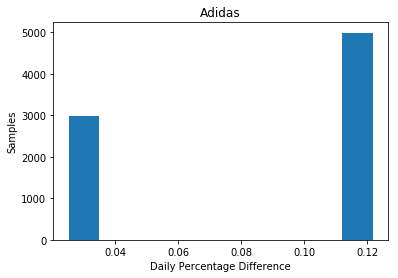

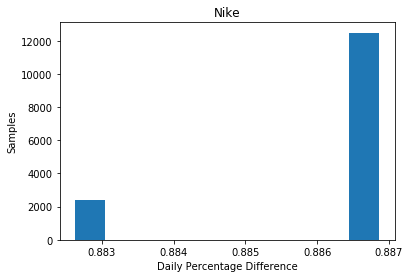

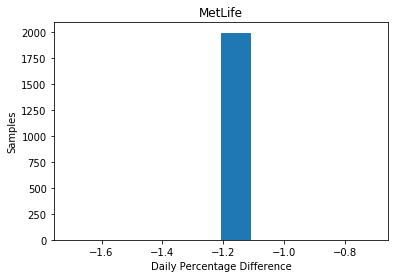

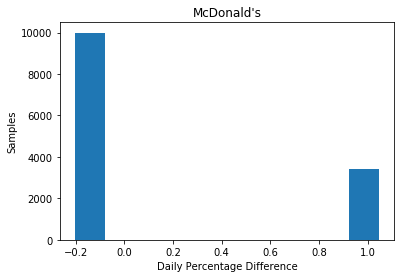

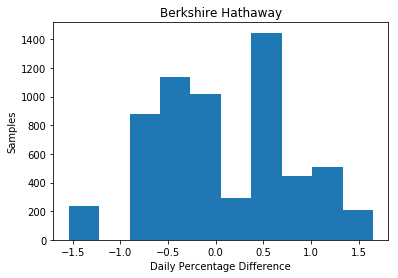

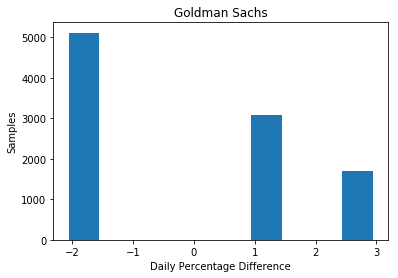

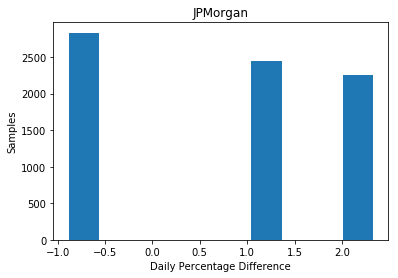

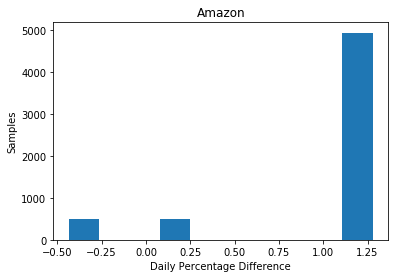

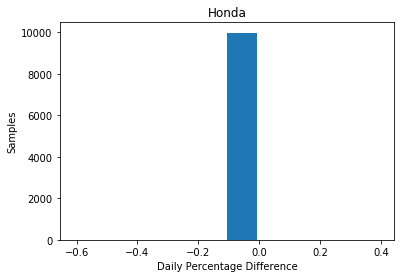

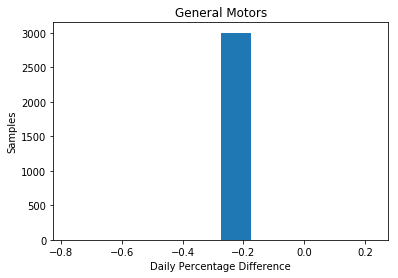

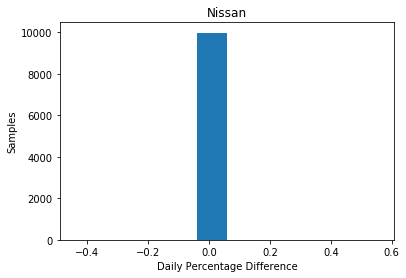

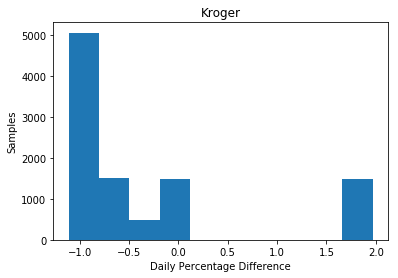

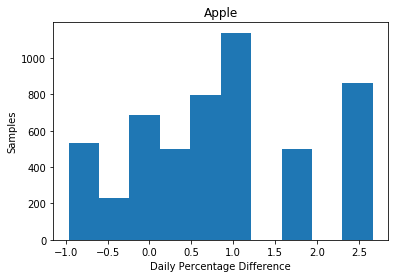

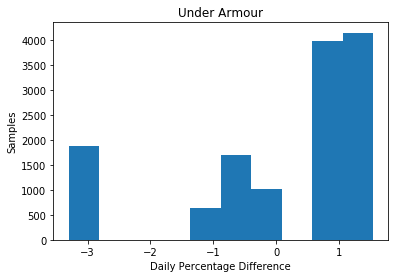

In [24]:
for ticker in tickers:
    plt.hist(df['daily_diff_percentage_of_stock'][df.ticker==ticker])
    plt.title(companies[ticker])
    plt.xlabel('Daily Percentage Difference')
    plt.ylabel('Samples')
    plt.show()

In [25]:
# Does ten rounds of parsing. After each iteration the current most frequent term per daily percentage difference
# value for each company are added to the stop word list and removed in the following iteration.
# Each iteration stores the current frequent term list in a dataframe, along with updating the ten most frequent terms
# dictionary with the largest absolute values for daily percentage difference.
text_parse_count = []
ten_most_influential_terms = {}
for count in range(10):
    df['tokens'] = df.text.apply(tokenizer,tknzr=tknzr,stop_words=stop_words)
    df_terms,df_avg_diff,terms = term_percentage_diff(df,tickers)
    text_parse_count.append((count,df_terms,df_avg_diff))
    ten_most = df_avg_diff.values
    ten_most_idx = np.argsort(ten_most[:,0])
    ten_most = ten_most[ten_most_idx][-10:]
    for idx in range(len(ten_most)):
        if len(ten_most_influential_terms) < 10:
            ten_most_influential_terms[np.abs(ten_most[idx,0])] = (ten_most[idx,2],ten_most[idx,1])
        else:
            min_value = min(ten_most_influential_terms.keys())
            if ten_most[idx,0] > min_value:
                del ten_most_influential_terms[min_value]
                ten_most_influential_terms[np.abs(ten_most[idx,0])] = (ten_most[idx,2],ten_most[idx,1])
    stop_words += terms

In [26]:
# Stores ten most frequent terms with largest daily percentage value difference in a dataframe.
daily_diff_abs = list(ten_most_influential_terms.keys())
terms = []
frequencies = []
for (term,frequency) in list(ten_most_influential_terms.values()):
    terms.append(term)
    frequencies.append(frequency)
ten_most_data = np.array([terms,daily_diff_abs,frequencies]).T

In [27]:
df_ten_most = pd.DataFrame(ten_most_data,columns=['Terms','Absolute Daily Percentage Differece','Frequency'])

In [28]:
df_ten_most.sort_values('Absolute Daily Percentage Differece',ascending=False)

,Terms,Absolute Daily Percentage Differece,Frequency
7,gs,2.94117647059,95
6,shares,2.66814019577,52
0,swag,2.63371323686,265
3,demanded,2.32766338406,364
5,peterjhasson,1.97064989518,125
8,company,1.84722799262,76
2,luv,1.79913801744,33
4,ثالث,1.65125495376,30
1,vai,1.54422087038,187


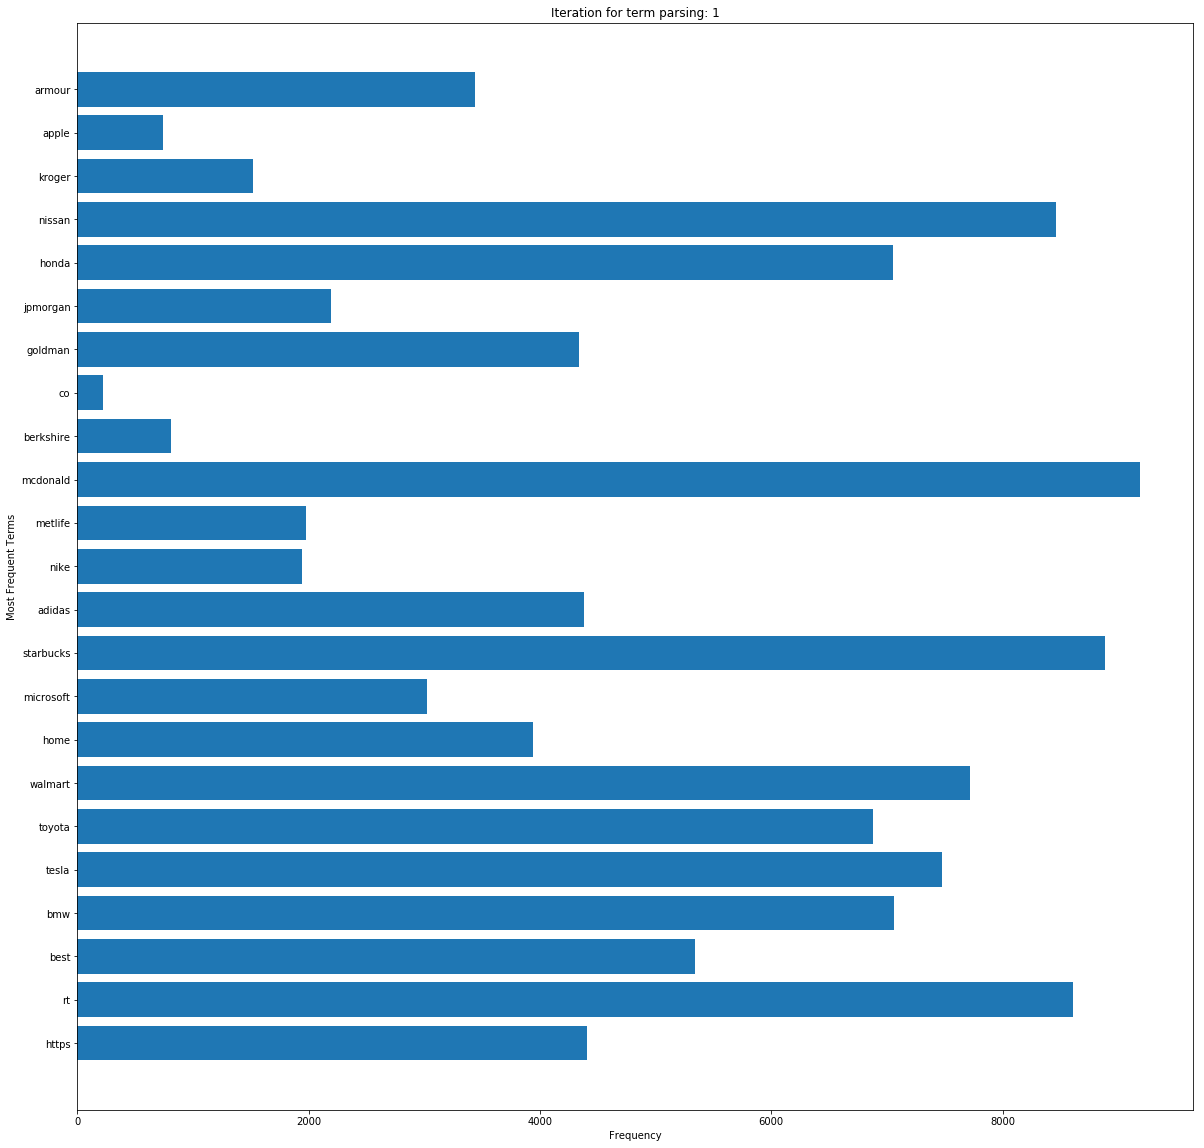

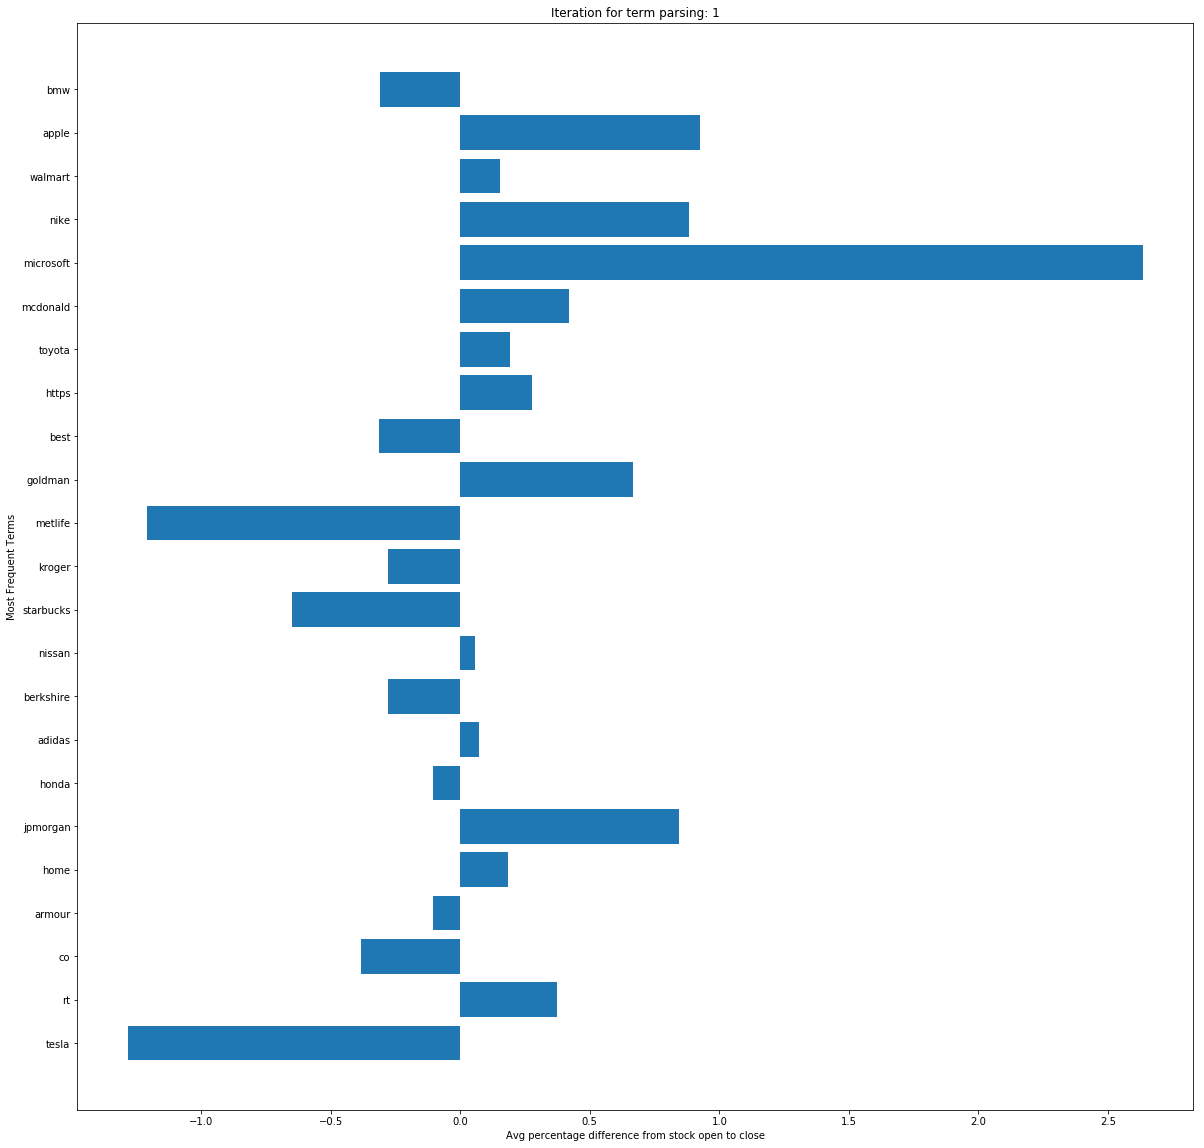

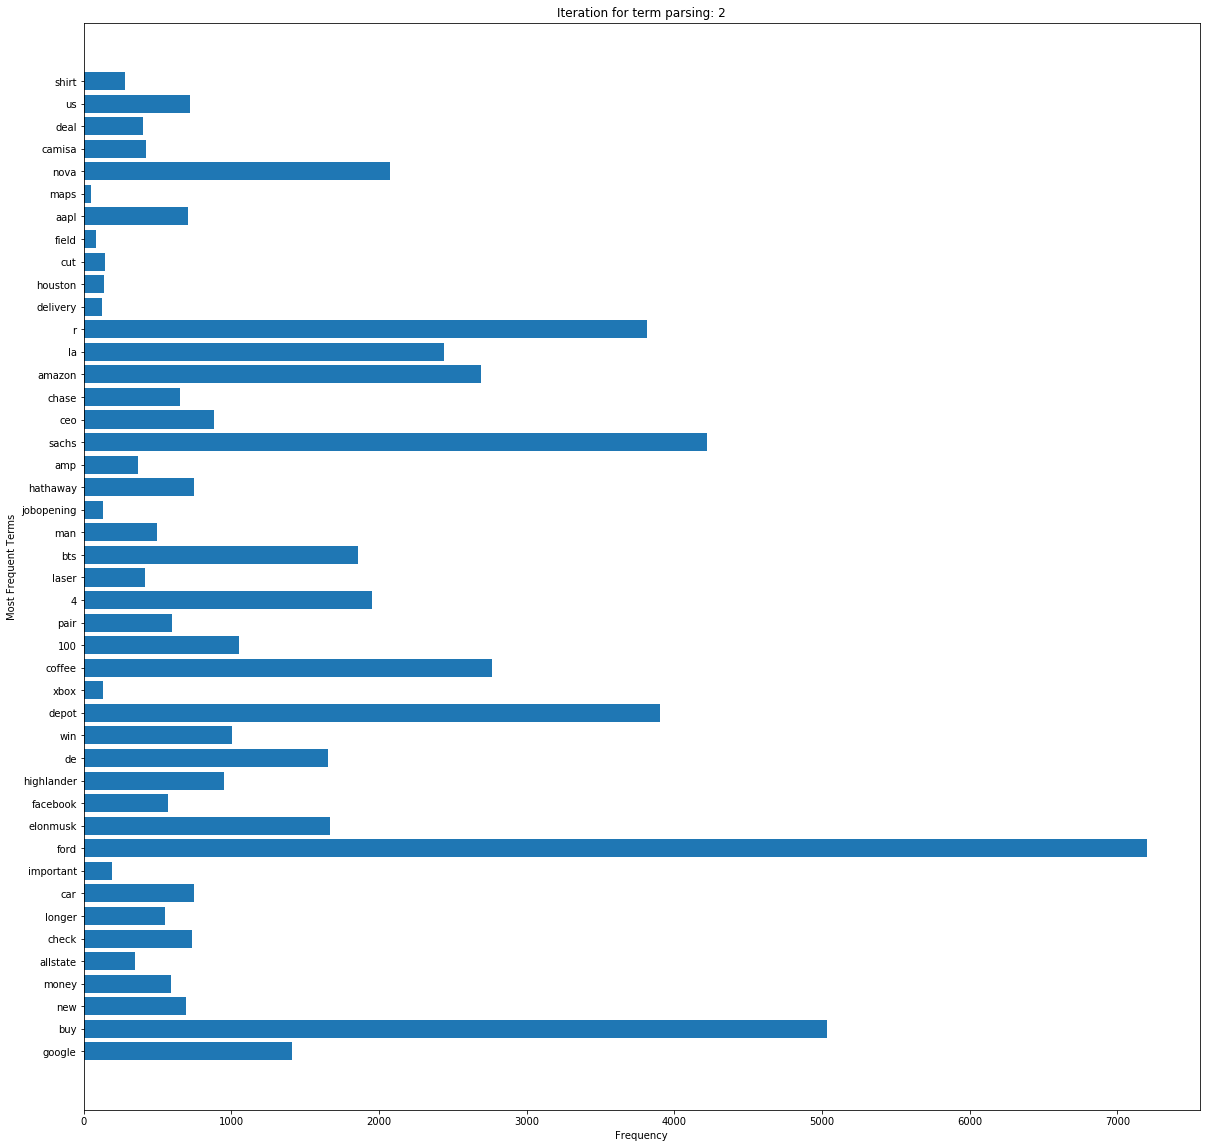

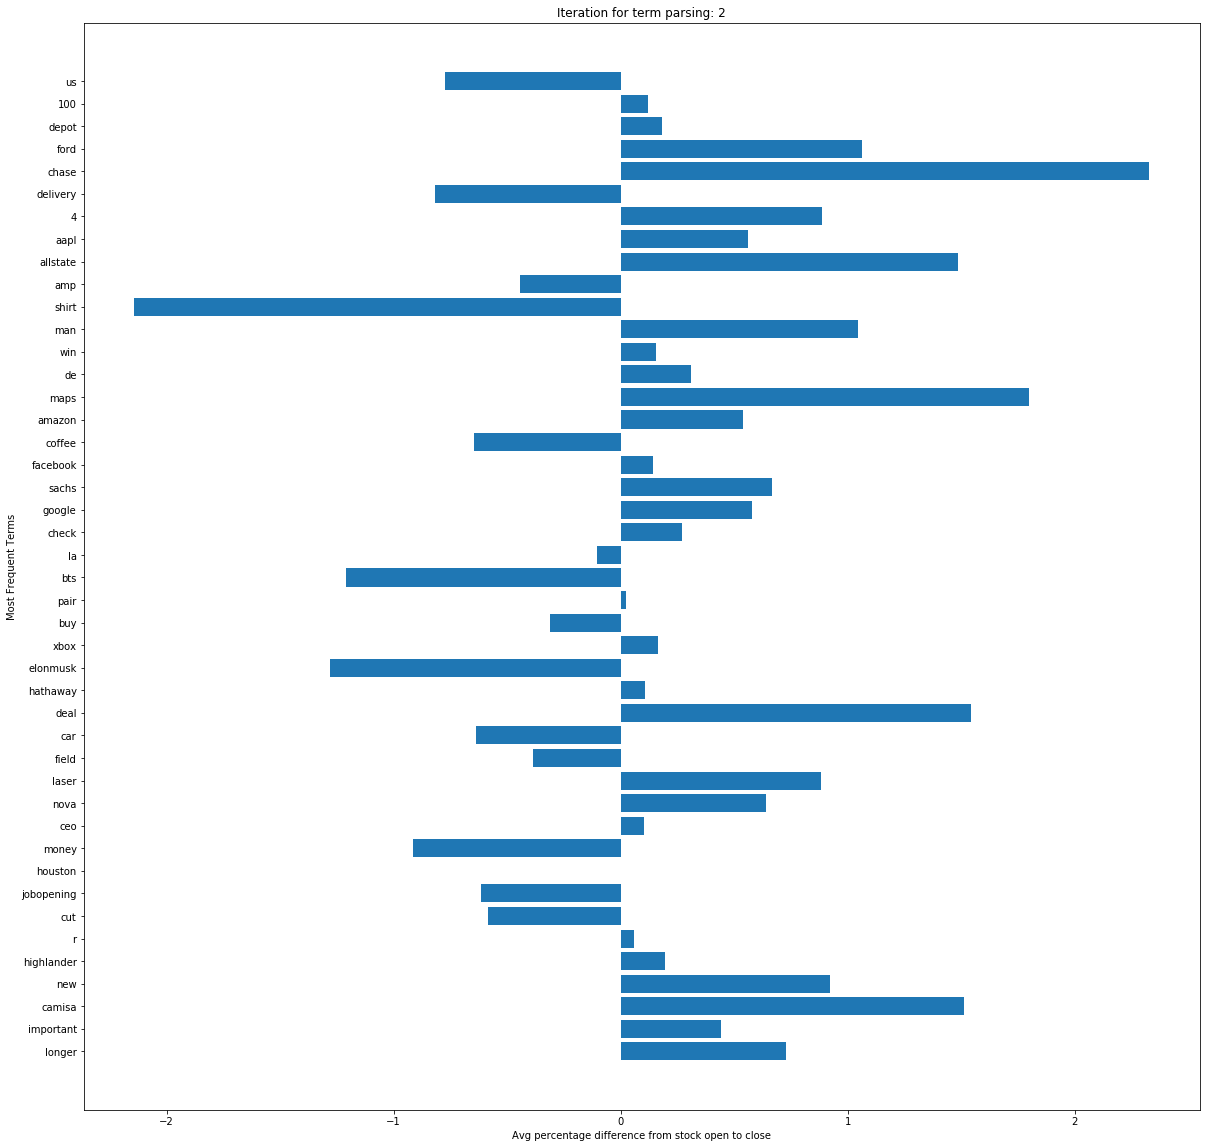

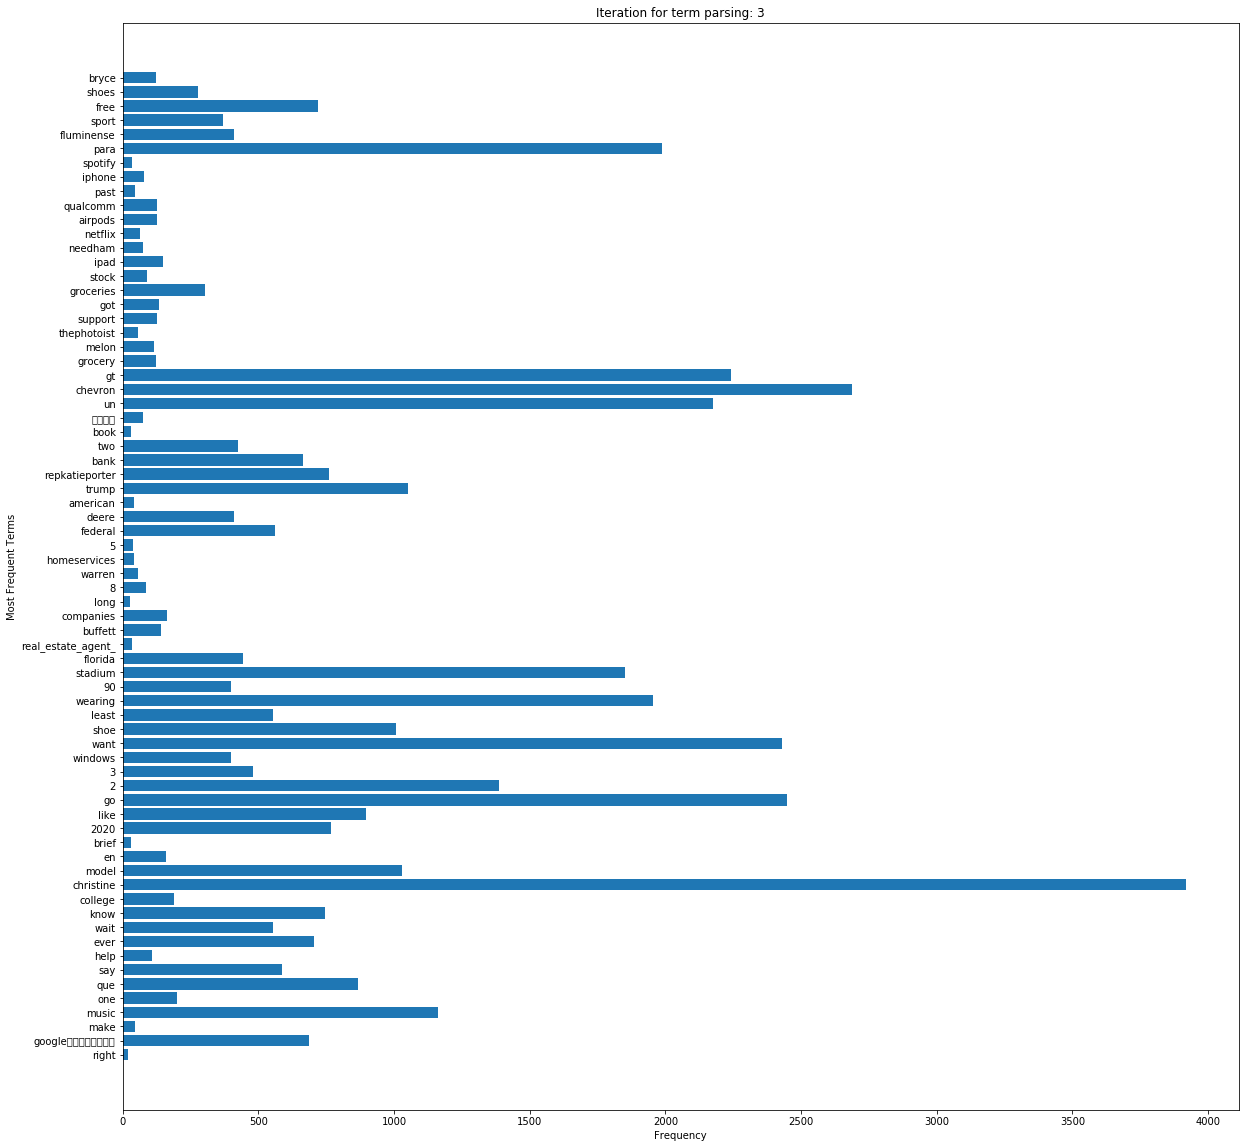

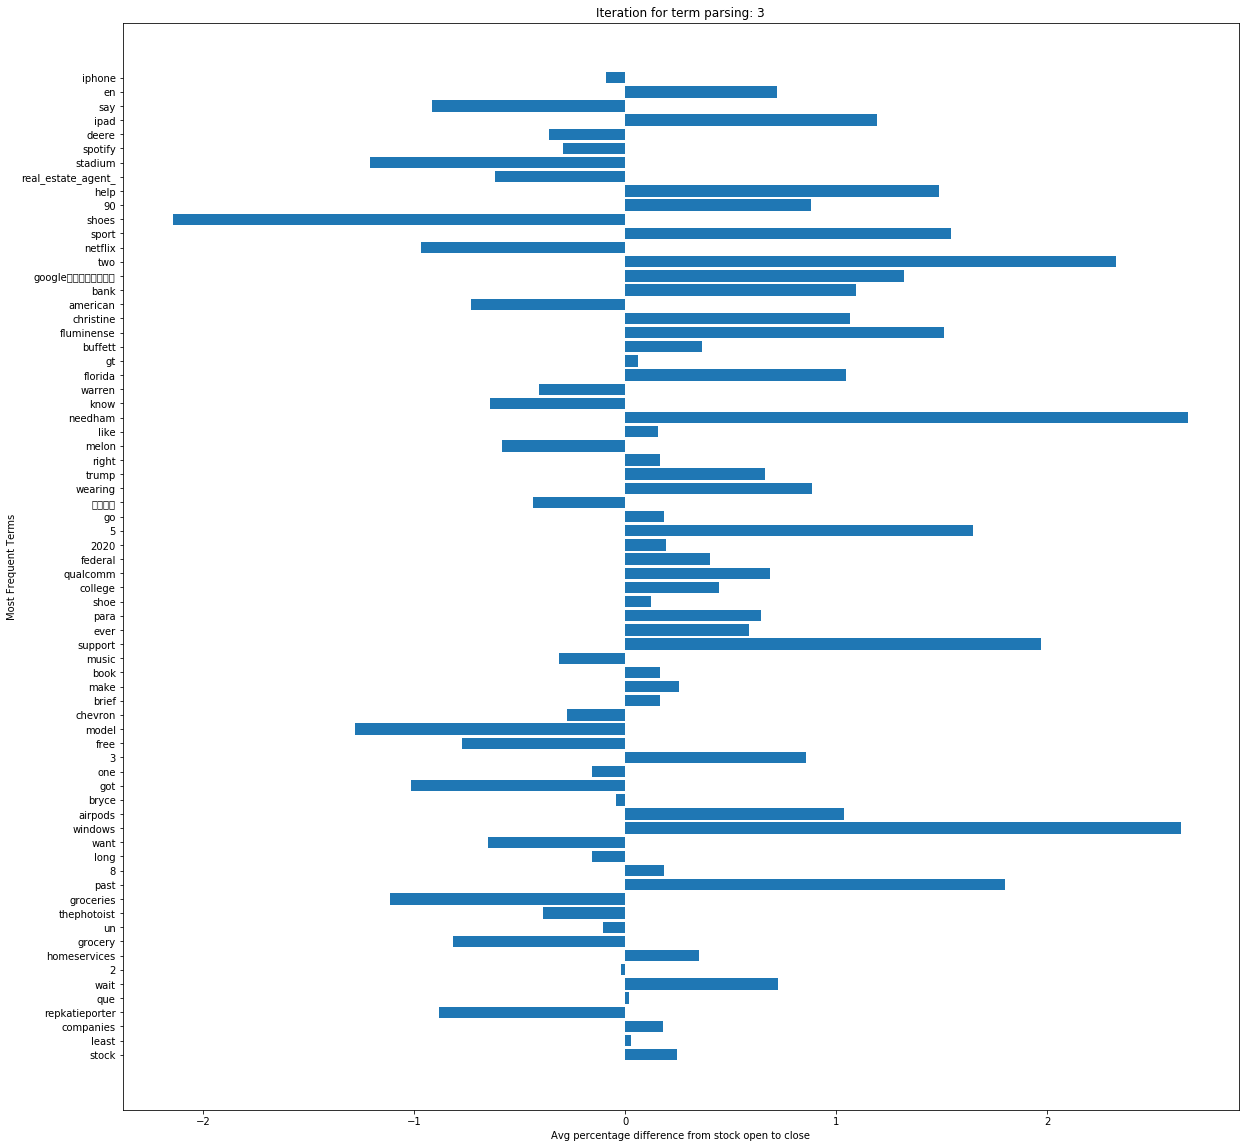

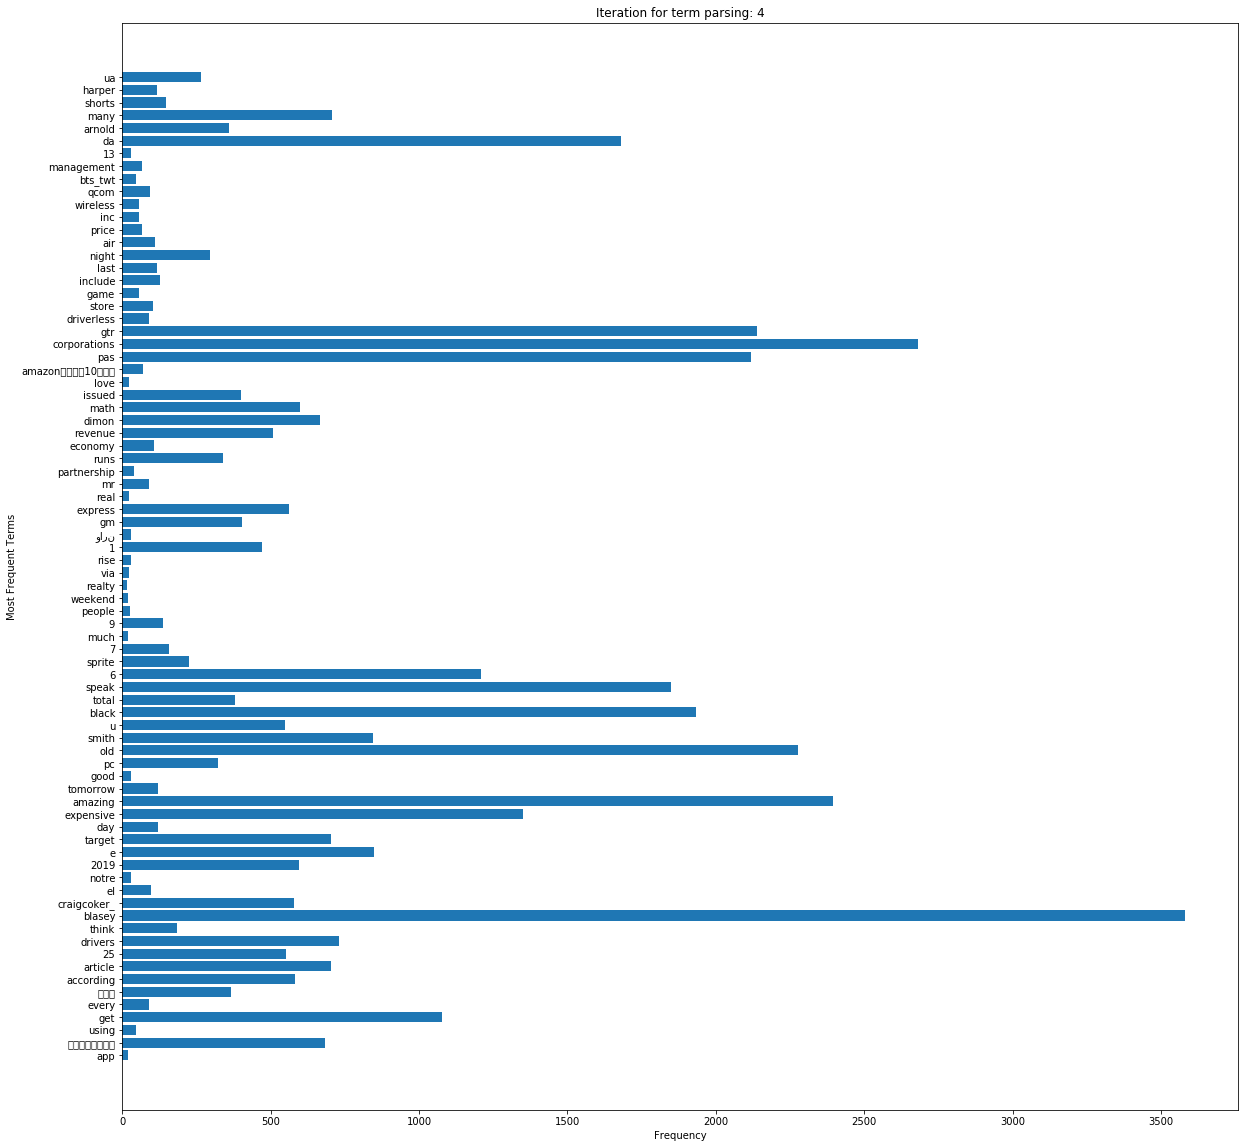

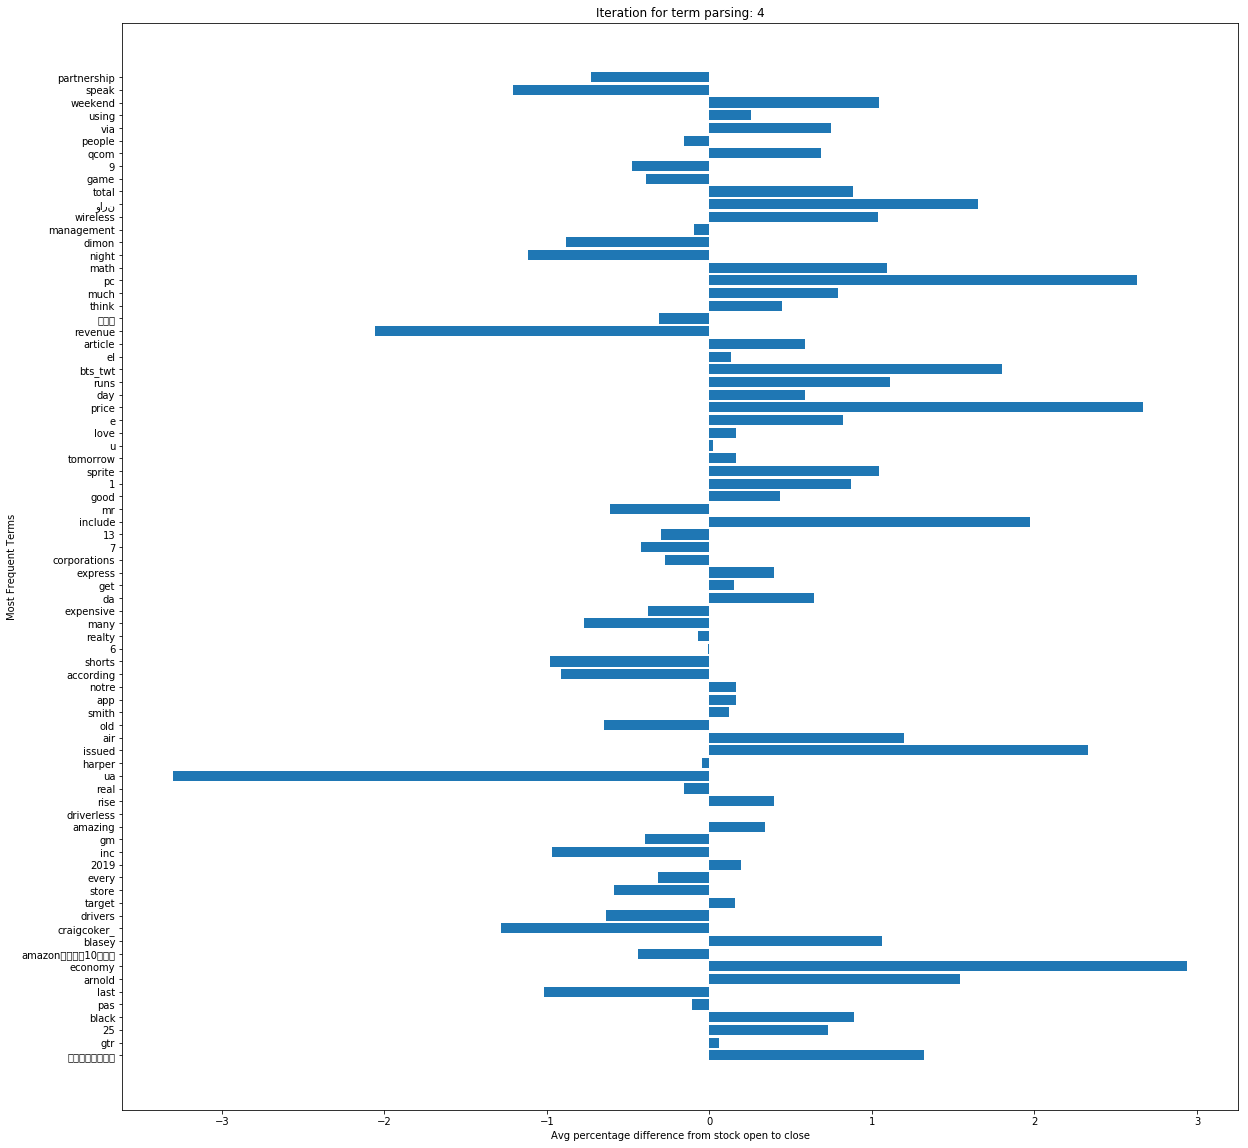

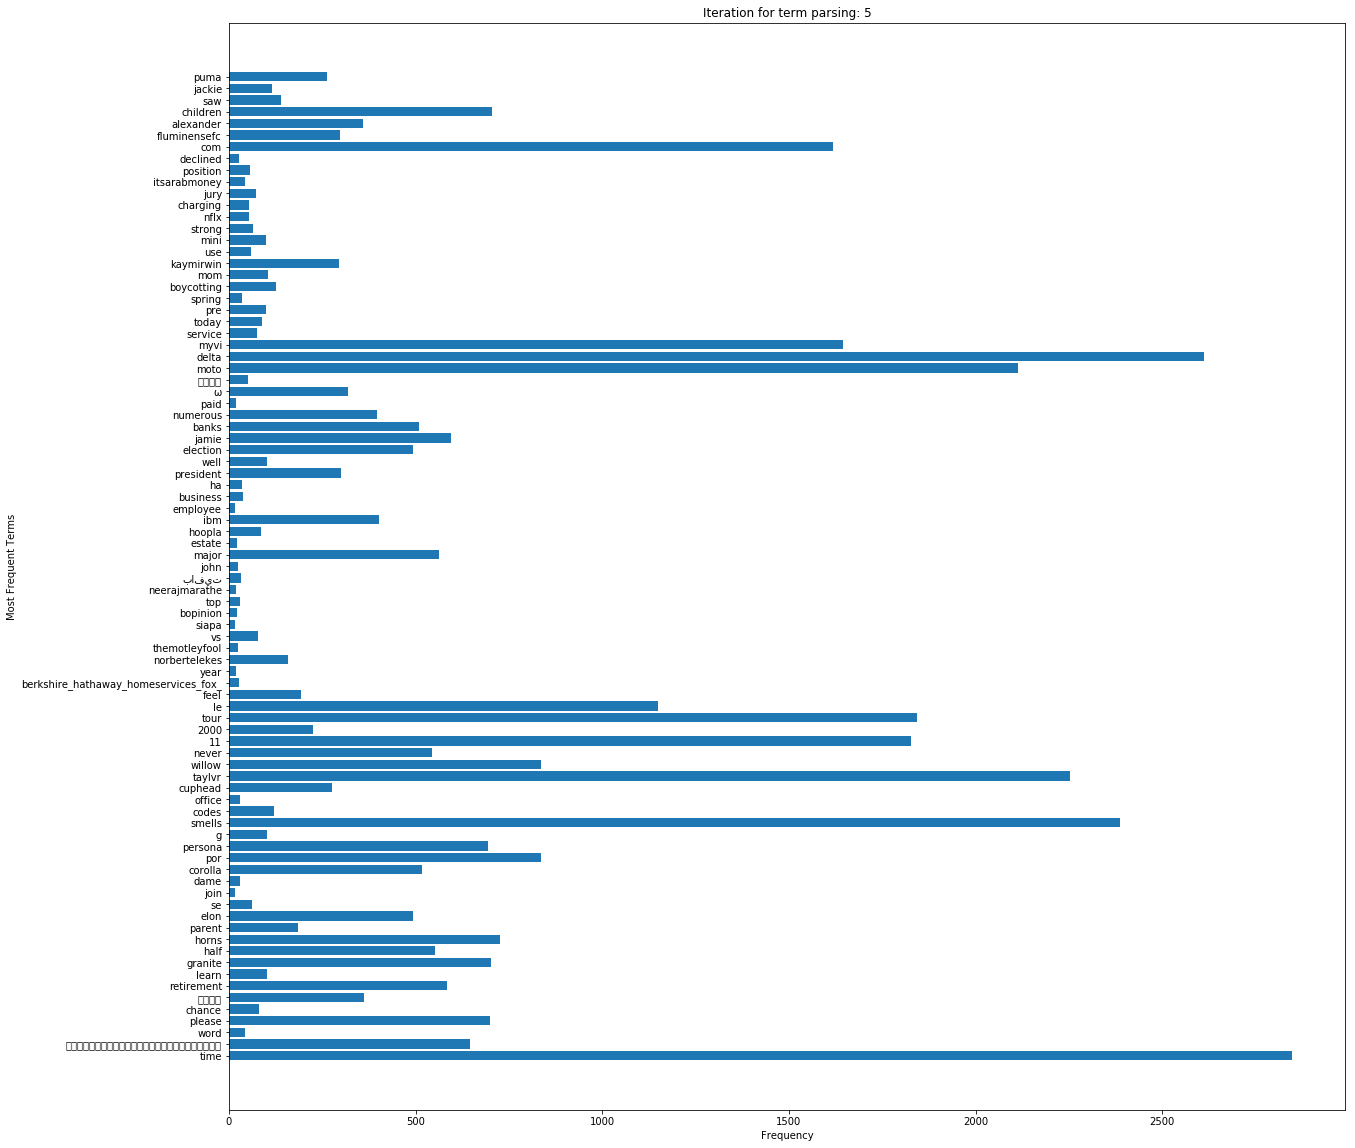

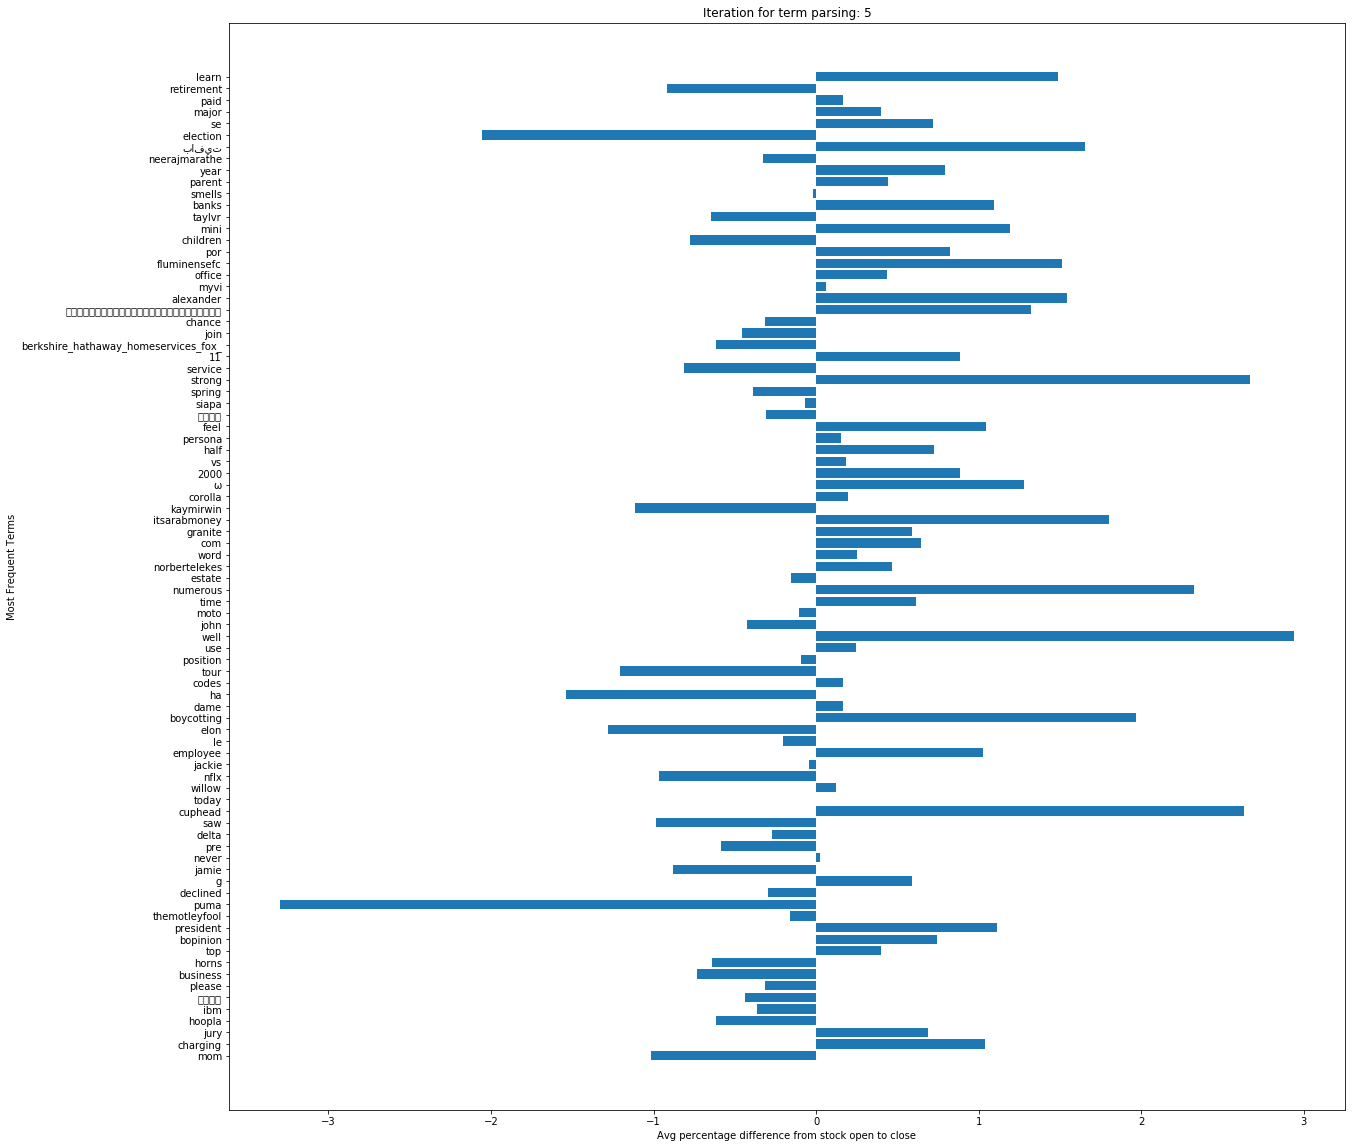

In [29]:
# Plots frequency of first five parsing iterations along with the corresponding daily percentage difference values.
for idx in range(5):
    plt.figure(figsize=(20,20))
    plt.barh(text_parse_count[idx][1]['Most frequent term'],text_parse_count[idx][1]['Frequency'])
    plt.xlabel('Frequency')
    plt.ylabel('Most Frequent Terms')
    plt.title('Iteration for term parsing: {0}'.format(idx+1))
    plt.show()
    plt.figure(figsize=(20,20))
    plt.barh(text_parse_count[idx][2]['Term'],text_parse_count[idx][2]['Avg % diff'])
    plt.xlabel('Avg percentage difference from stock open to close')
    plt.ylabel('Most Frequent Terms')
    plt.title('Iteration for term parsing: {0}'.format(idx+1))
    plt.show()